# Feature Matching

+ Template matching requires an exact copy of the image to find

+ Feature matching extracts defining key features from an input image (using ideas from corner, edge, and contour detection).
+ Then using a distance calculation, finds all the matches in a secondary image
+ This means we are no longer required to have an exact copy of the target image

### Three main methods
- Brute-Force Matching with ORB Descriptors
- Brute-Force Matching with SIFT
- FLANN based Matcher

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [3]:
reeses = cv2.imread("../imgs/reeses_puffs.png",0)

In [4]:
reeses.shape

(560, 560)

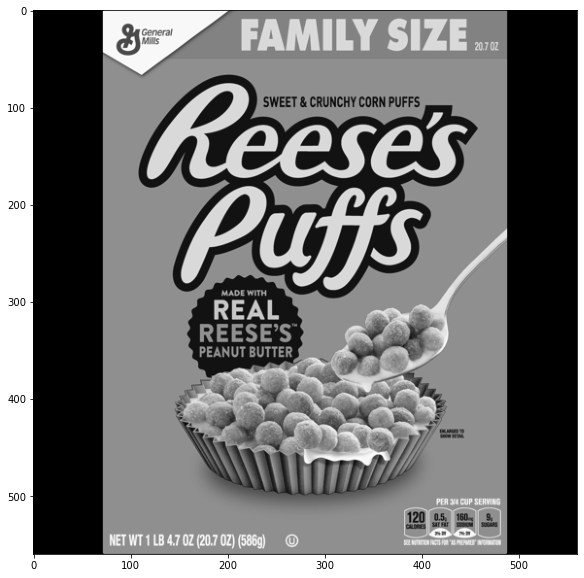

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread("../imgs/many_cereals.jpg", 0)

In [7]:
cereals.shape

(425, 757)

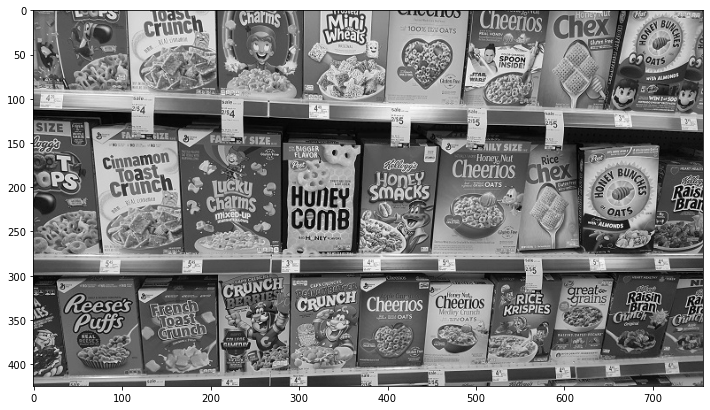

In [8]:
display(cereals)

#### Brute-Force Matching with ORB Descriptors

In [9]:
orb = cv2.ORB_create()

In [10]:
kp1,des1 = orb.detectAndCompute(reeses,None)

In [11]:
kp2,des2 = orb.detectAndCompute(cereals,None)

In [12]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [13]:
matches = bf.match(des1,des2)

In [14]:
dir(matches[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'distance',
 'imgIdx',
 'queryIdx',
 'trainIdx']

In [15]:
matches = sorted(matches, key=lambda x:x.distance)

In [16]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[0:25],None,flags=2)

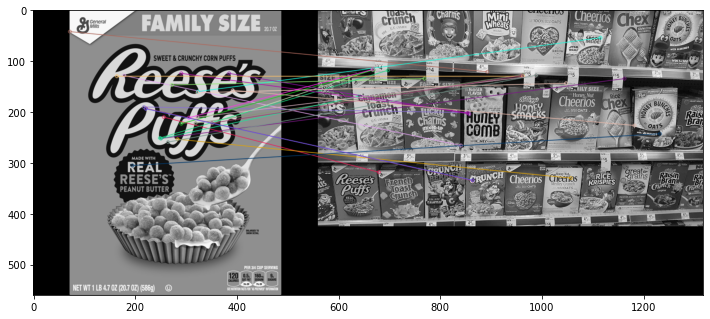

In [17]:
display(reeses_matches)

#### Brute-Force Matching with SIFT

In [18]:
sift = cv2.xfeatures2d.SIFT_create()

In [19]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [20]:
bf = cv2.BFMatcher()

In [21]:
matches = bf.knnMatch(des1,des2,k=2)

In [22]:
good = []

# LESS DISTANCE  == BETTER MATCH
# RATIO MATCH < 75% MATCH2
for match1,match2 in matches:
    # IF MATCH1 DISTANCE IS ESS THAN 75% OF MATCH2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LET'S KEEP IT
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [23]:
len(good)

79

In [24]:
len(matches)

1501

In [25]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

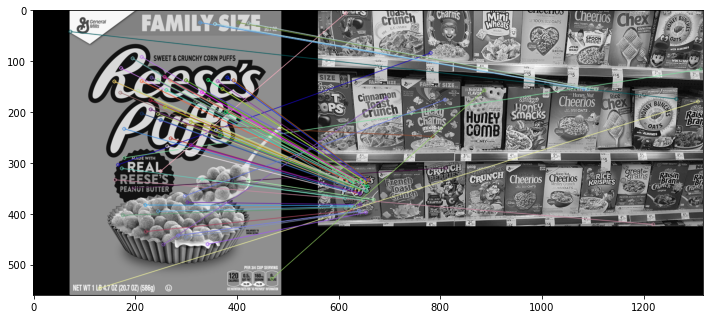

In [26]:
display(sift_matches)

#### FLANN based Matcher

In [27]:
sift = cv2.xfeatures2d.SIFT_create()

In [28]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [29]:
# FLANN 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [30]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [31]:
matches = flann.knnMatch(des1,des2,k=2)

In [33]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

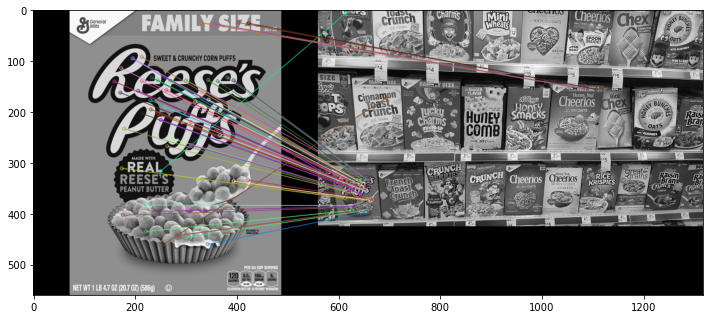

In [34]:
display(flann_matches)

#### Single vs Match Colors

In [35]:
sift = cv2.xfeatures2d.SIFT_create()

In [36]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [37]:
# FLANN 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [38]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [39]:
matches = flann.knnMatch(des1,des2,k=2)

In [40]:
matchesMask = [[0,0] for i in range(len(matches))]

In [41]:
matchesMask[0]

[0, 0]

In [43]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [46]:
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [47]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

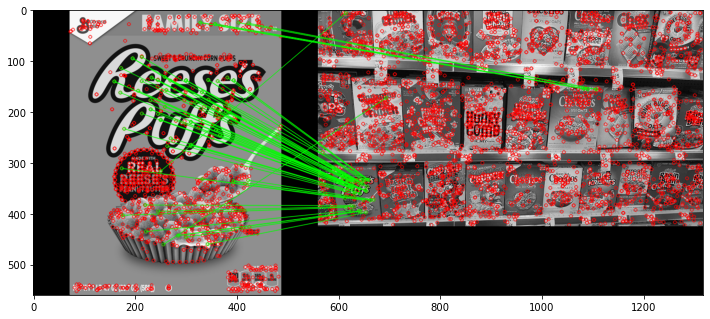

In [48]:
display(flann_matches)

# Great!